In [49]:
import pandas as pd
import sklearn
from sklearn.cluster import Birch
from numpy import unique
import numpy as np
from sklearn.neighbors import DistanceMetric
import gower
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [106]:
reclamos_df = pd.read_excel('BD_Reclamos.xlsx')
reclamos_df

,Número de reclamación,Fecha de recepción,Fecha de incidente,Código del aeropuerto,Nombre del aeropuerto,Nombre de la aerolínea,Código de reclamación,Tipo de reclamación,Sitio de reclamación,Código artículo,Artículo,Importe de la reclamación,Estado,Cerrar cantidad
0,0203004L,2022-02-03,2021-12-04,JFK,John F. Kennedy International,Jet Blue,PPP,Pérdida de propiedad del pasajero,Checkpoint,DIN-01,Dinero,$800.00,Aprobado,$800.00
1,0203016L,2022-02-03,2022-01-01,BUF,Buffalo Niagara International,UAL,DP,Daños a la propiedad,Checked Baggage,EQ-01,Equipaje,$85.40,Aprobado,$85.40
2,0203018L,2022-02-03,2022-01-03,LAX,Los Angeles International Airport,UAL,DP,Daños a la propiedad,Checkpoint,EQ-01,Equipaje,$25.00,Aprobado,$25.00
3,0203027L,2022-02-03,2022-01-10,IND,Indianapolis International,America Trans Air,PPP,Pérdida de propiedad del pasajero,Checked Baggage,ANT-01,Anteojos - (incluyendo lentes de contacto),$518.00,Aprobado,$518.00
4,0203035L,2022-02-03,2022-01-11,LAX,Los Angeles International Airport,Delta Air Lines,DP,Daños a la propiedad,Checkpoint,OT-01,Otros,$75.00,Aprobado,$75.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,0228035L,2022-02-28,2022-01-03,RDU,Raleigh-Durham International,NaN,DP,Daños a la propiedad,Checkpoint,CL-01,Computadora - Laptop,$150.00,Aprobado,$150.00
486,0228009L,2022-02-28,2022-02-03,SEA,Seattle-Tacoma International,NaN,DP,Daños a la propiedad,Checked Baggage,OT-01,Otros,$70.00,Settled,$35.00
487,0228023L,2022-02-28,2022-02-09,EWR,Newark International Airport,NaN,PPP,Pérdida de propiedad del pasajero,Checked Baggage,OT-01,Otros,$100.00,Settled,$50.00
488,0228024L,2022-02-28,2022-01-07,JFK,John F. Kennedy International,NaN,DP,Daños a la propiedad,Checked Baggage,EQ-01,Equipaje,$350.00,Settled,$175.00


In [4]:
# Takes a dataframe as an input and returns a gower distance matrix.
#  code taken from https://datascience.stackexchange.com/questions/8681/clustering-for-mixed-numeric-and-nominal-discrete-data

# https://medium.com/analytics-vidhya/the-ultimate-guide-for-clustering-mixed-data-1eefa0b4743b

def calculate_gower_distance(df):
    variable_distances = list()
  
    for col in range(df.shape[1]):
    
        feature = df.iloc[:,[col]]
        if feature.dtypes.values == object:

            feature_dist = DistanceMetric.get_metric('dice').pairwise(pd.get_dummies(feature, drop_first=True))

        else:

            feature_dist = DistanceMetric.get_metric('manhattan').pairwise(feature) / max(np.ptp(feature.values),1)


        variable_distances.append(feature_dist)


    return np.array(variable_distances).mean(0)

test = gower.gower_matrix(reclamos_df)

print(test[0])
len(test)

# test = Birch(n_clusters=None)
# test.fit(reclamos_df)

[0.         0.85714287 0.78571427 0.71428573 0.78571427 0.85714287
 0.78571427 0.71428573 0.85714287 0.78571427 0.85714287 0.78571427
 0.85714287 0.9285714  0.78571427 0.9285714  0.9285714  0.78571427
 0.71428573 0.71428573 0.9285714  0.9285714  0.9285714  0.9285714
 0.85714287 0.9285714  0.9285714  0.9285714  0.85714287 0.9285714
 0.9285714  0.85714287 0.9285714  0.9285714  0.71428573 0.85714287
 0.71428573 0.85714287 0.9285714  0.9285714  0.9285714  0.71428573
 0.9285714  0.78571427 0.78571427 0.85714287 0.5714286  0.78571427
 0.85714287 0.9285714  1.         0.85714287 1.         1.
 1.         0.9285714  0.85714287 0.9285714  1.         1.
 0.78571427 0.78571427 0.9285714  0.9285714  0.9285714  0.78571427
 0.9285714  0.9285714  1.         1.         1.         1.
 0.9285714  0.9285714  0.78571427 0.85714287 1.         0.85714287
 0.71428573 0.85714287 0.9285714  0.5714286  0.9285714  0.85714287
 0.85714287 0.78571427 0.85714287 1.         1.         1.
 1.         1.         1.    

490

In [10]:
clusters = (KMedoids(n_clusters=6, 
                           metric='precomputed',
                           method='pam', init='build', 
                           max_iter=300)
            .fit(test)
            .labels_)

clusters

array([2, 0, 2, 1, 2, 2, 2, 5, 2, 2, 0, 2, 4, 0, 1, 4, 0, 5, 1, 5, 3, 0,
       3, 0, 3, 0, 0, 2, 2, 4, 4, 2, 2, 4, 1, 2, 1, 2, 4, 0, 0, 1, 0, 2,
       5, 2, 2, 1, 1, 0, 0, 5, 3, 3, 3, 2, 1, 2, 4, 2, 1, 1, 0, 2, 0, 1,
       2, 0, 0, 3, 0, 3, 4, 3, 2, 0, 4, 0, 1, 1, 0, 1, 0, 2, 2, 5, 0, 0,
       3, 0, 0, 0, 0, 3, 5, 5, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 3, 0, 0, 1,
       0, 3, 2, 3, 5, 3, 0, 0, 0, 2, 4, 2, 2, 1, 1, 4, 4, 1, 1, 2, 2, 1,
       4, 1, 1, 1, 4, 1, 2, 2, 4, 2, 1, 2, 2, 4, 2, 3, 0, 3, 0, 0, 3, 3,
       3, 0, 3, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 4, 3, 1, 4, 4,
       3, 0, 4, 1, 1, 2, 4, 1, 4, 4, 4, 4, 3, 1, 1, 3, 4, 0, 1, 3, 2, 2,
       0, 1, 1, 2, 1, 2, 2, 1, 3, 3, 3, 3, 0, 5, 3, 3, 3, 0, 5, 5, 0, 0,
       4, 3, 0, 4, 4, 3, 1, 3, 1, 1, 3, 0, 0, 0, 1, 0, 0, 0, 3, 3, 1, 1,
       5, 4, 1, 1, 0, 5, 0, 2, 4, 4, 0, 3, 4, 1, 2, 1, 1, 4, 3, 2, 2, 5,
       0, 2, 1, 1, 1, 3, 2, 2, 0, 3, 5, 0, 5, 0, 0, 2, 0, 0, 5, 4, 1, 1,
       0, 0, 3, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 5,

In [5]:
# Creating the BIRCH clustering model
model = Birch(branching_factor = 50, n_clusters = None, threshold = 2)
 
# Fit the data (Training)
model.fit(test)
 
# Predict the same data
pred = model.predict(test)
pred

array([0, 1, 1, 0, 3, 3, 1, 0, 3, 1, 1, 4, 1, 1, 0, 1, 1, 0, 0, 0, 3, 1,
       2, 1, 2, 3, 1, 3, 4, 1, 1, 4, 3, 1, 0, 4, 0, 4, 1, 1, 1, 0, 4, 3,
       0, 3, 0, 0, 0, 4, 1, 0, 3, 3, 2, 4, 0, 4, 1, 3, 0, 0, 3, 3, 4, 0,
       3, 1, 2, 2, 2, 2, 1, 4, 4, 0, 1, 0, 0, 0, 1, 0, 1, 4, 4, 0, 0, 1,
       2, 3, 2, 1, 1, 2, 0, 0, 0, 3, 0, 1, 0, 1, 0, 1, 3, 4, 1, 0, 1, 0,
       1, 4, 4, 2, 0, 2, 4, 1, 1, 3, 1, 3, 4, 0, 0, 1, 1, 0, 0, 4, 3, 0,
       1, 0, 0, 0, 1, 0, 0, 4, 1, 4, 0, 4, 3, 1, 4, 2, 1, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 3, 1, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 2, 0, 1, 1,
       2, 2, 3, 0, 2, 3, 1, 3, 1, 1, 1, 1, 2, 0, 0, 2, 3, 1, 0, 2, 3, 4,
       1, 0, 0, 3, 0, 3, 3, 0, 2, 2, 4, 2, 1, 0, 2, 3, 4, 1, 0, 0, 1, 1,
       3, 2, 1, 1, 1, 3, 0, 2, 3, 0, 2, 1, 1, 1, 0, 1, 1, 2, 2, 2, 0, 3,
       0, 1, 0, 0, 1, 0, 1, 4, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 2, 3, 3, 0,
       1, 3, 0, 0, 0, 2, 3, 4, 2, 2, 0, 1, 0, 1, 1, 3, 1, 0, 0, 1, 0, 0,
       1, 1, 2, 0, 1, 4, 3, 1, 3, 4, 4, 0, 3, 3, 0,

In [6]:
# reclamos_df.insert(len(reclamos_df.columns), 'Cluster', pred)
reclamos_df['Cluster'] = pred

In [17]:
reclamos_df.to_excel('Reclamos nuevo.xlsx', index=False)

In [107]:
reclamos_util_df = reclamos_df[[# 'Código del aeropuerto', 
                                'Nombre del aeropuerto',
       'Nombre de la aerolínea', #'Código de reclamación',
       'Tipo de reclamación', 'Sitio de reclamación', # 'Código artículo',
       'Artículo', 'Importe de la reclamación', 'Estado', 'Cerrar cantidad']]
       #'Cluster']]
    
reclamos_gower = gower.gower_matrix(reclamos_util_df)

# cur_labels = list()
# cur_sublabels = list()
# cur_db = 0
# cur_silh = 0
range_list = [x / 100.0 for x in range(50, 250)]
cur_labels = None
cur_sublabels = None
cur_db = None
cur_silh = None

max_db = 999
min_silh = -1

for i in range_list:
    # model2 = Birch(branching_factor = 50, n_clusters = 20, threshold = i)
    model2 = Birch(branching_factor = 50, n_clusters = 50, threshold = i)
    model2.fit(reclamos_gower)

    # Predict the same data
    pred = model2.predict(reclamos_gower)

    # if len(unique(model2.subcluster_labels_)) > 15:
       # print("More than 25 clusters")
    #     continue

    cur_db = davies_bouldin_score(reclamos_gower, model2.labels_)
    # print(cur_db)
    cur_silh = silhouette_score(reclamos_gower, model2.labels_)
    # print(cur_silh)

    if cur_db < max_db and cur_silh > min_silh:
        max_db = cur_db
        min_silh = cur_silh

        cur_labels = pred
        cur_sublabels = model2.subcluster_labels_

print(cur_labels)

print(cur_sublabels)

print(unique(cur_sublabels))

print("Davies Bouldin: ", max_db) # mas cerca a 0 mejor
print("Silhouette: ", min_silh) # Mejor 1, peor -1

c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.py:647: ConvergenceWarning: Number of subclusters found (49) by Birch is less than (50). Decrease the threshold.
  warnings.warn(
c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.py:647: ConvergenceWarning: Number of subclusters found (48) by Birch is less than (50). Decrease the threshold.
  warnings.warn(
c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.py:647: ConvergenceWarning: Number of subclusters found (47) by Birch is less than (50). Decrease the threshold.
  warnings.warn(
c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.py:647: ConvergenceWarning: Number of subclusters found (46) by Birch is less than (50). Decrease the threshold.
  warnings.warn(
c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.

c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.py:647: ConvergenceWarning: Number of subclusters found (20) by Birch is less than (50). Decrease the threshold.
  warnings.warn(
c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.py:647: ConvergenceWarning: Number of subclusters found (19) by Birch is less than (50). Decrease the threshold.
  warnings.warn(
c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.py:647: ConvergenceWarning: Number of subclusters found (22) by Birch is less than (50). Decrease the threshold.
  warnings.warn(
c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.py:647: ConvergenceWarning: Number of subclusters found (22) by Birch is less than (50). Decrease the threshold.
  warnings.warn(
c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.

c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.py:647: ConvergenceWarning: Number of subclusters found (15) by Birch is less than (50). Decrease the threshold.
  warnings.warn(
c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.py:647: ConvergenceWarning: Number of subclusters found (14) by Birch is less than (50). Decrease the threshold.
  warnings.warn(
c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.py:647: ConvergenceWarning: Number of subclusters found (14) by Birch is less than (50). Decrease the threshold.
  warnings.warn(
c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.py:647: ConvergenceWarning: Number of subclusters found (14) by Birch is less than (50). Decrease the threshold.
  warnings.warn(
c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.

c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.py:647: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (50). Decrease the threshold.
  warnings.warn(
c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.py:647: ConvergenceWarning: Number of subclusters found (8) by Birch is less than (50). Decrease the threshold.
  warnings.warn(
c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.py:647: ConvergenceWarning: Number of subclusters found (8) by Birch is less than (50). Decrease the threshold.
  warnings.warn(
c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.py:647: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (50). Decrease the threshold.
  warnings.warn(
c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.py:6

[11 33 40 19 42 30 40 20 30 40 33 36 33 28 46 35 34 46 43  9 38 28 24 28
 44 38 28 37 12 26 26 12 37 26 17 12 17 12 26 26 26 15 48 30 20 42 11 20
  5 44 28  2 38 38 24 12 21 12 26 37 17 20 30 30 48 20 22 29 24 24 24 24
 31 12 12 25 26 25 21 10 32 11 33 36 36 47  5 28 24 38 24 28 28 24  2  9
 17 37 21 26 43 33 11 40 42 48 33 16 40 11 33 49 13 44  6 24 44 28 29 45
 31 37 12 10 10 40 40 16 11 36 42 20 33 20 20 15 40 20 11 36 33 36 20 36
 42 33 36 24 28 24 28 29 24 24 24 24 24 24 38 28 10  1 21 10 10 10 10 45
 45 25 21 26 39 21 26 26 39 39 37 10 39 45 26 37 26 26 26 26 39 10 17 39
 37 33 20 48 42 36 33 11 20 30 20 30 30 46 24 24 44 24 28  0 24 38 44 28
  2  6 26 26 37 39 31 26 31 37 20 24 37 10 39 33 33 33 20 33 28 23 24 24
 10 37 21 33 20  4 28  0 26 12 26 26 26 39 26 11 15 20 15 33 48 42 42 20
 40 30 20 19 20 49 22  7 24 24  6 28  6 28 29 41 28  0  6 26 21 10 40 33
 48 20 33 36 30 33 30 36 36 11 30 30 20 33 33 36 11 15 33 30 30 36 30 20
 20 40  5 35 34 22 22 43 13  8 44 28  6 28  3  9  2

c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.py:647: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (50). Decrease the threshold.
  warnings.warn(
c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.py:647: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (50). Decrease the threshold.
  warnings.warn(
c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.py:647: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (50). Decrease the threshold.
  warnings.warn(
c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.py:647: ConvergenceWarning: Number of subclusters found (4) by Birch is less than (50). Decrease the threshold.
  warnings.warn(
c:\users\renato\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_birch.py:6

In [108]:
reclamos_df['Cluster'] = cur_labels

# reclamos_df.to_excel('Reclamos_Few20.xlsx', index=False)

In [110]:
def categorizar(row):
    # if row['Cluster'] in [13, 5, 6, 9, 11, 15, 3, 2, 4]:
    
    # if (row['Cluster'] in [2, 48, 44, 45, 31, 15, 17, 25, 19, 29, 34, 0, 22, 9, 1, 46, 5, 35,
     # 43, 3, 7, 27, 13, 16, 49, 8, 41, 14, 18, 4, 32, 47, 23]):
        
    if (row['Cluster'] in [34,0, 22, 9, 1, 46, 5, 35,
     43, 3, 7, 27, 13, 16, 49, 8, 41, 14, 18, 4, 32, 47, 23]):
        return 'ANOMALO'
    else:
        return 'NORMAL'

# 13 5 6 9 11 15 3 2 4
# 1 0 7 10 12 19 18 17 16 14 8

reclamos_df['Tipo de grupo'] = reclamos_df.apply(categorizar, axis=1)
reclamos_df.to_excel('Reclamos_Few50.xlsx', index=False)

reclamos_df['Cluster'].value_counts()

26    52
33    34
24    34
28    31
20    29
10    26
30    24
36    22
40    21
37    17
12    15
11    13
21    13
39    11
38    11
42    11
6     11
2      9
48     8
44     7
45     7
31     7
15     6
17     6
25     5
19     5
29     5
34     4
0      4
22     4
9      3
1      3
46     3
5      3
35     3
43     3
3      2
7      2
27     2
13     2
16     2
49     2
8      1
41     1
14     1
18     1
4      1
32     1
47     1
23     1
Name: Cluster, dtype: int64

In [8]:
model2.root_

AttributeError: 'Birch' object has no attribute 'children_'

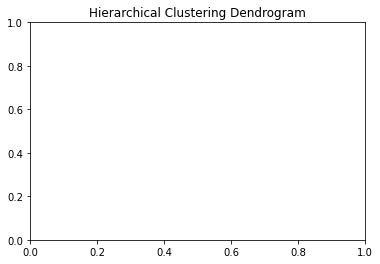

In [40]:
# From: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model2, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()